In [13]:
import os, umap
import numpy as np
import pandas as pd
import seaborn as sns

In [72]:
df = pd.read_csv('/Users/alimehdi/Desktop/COVID-19 Dataset/samples_matrix.tsv', sep='\t') # loading the file as a dataframe
# metadata = pd.read_csv('/Users/alimehdi/Desktop/COVID-19 Dataset/samples_metadata.tsv', sep='\t')
# print("Shape of the matrix", df.shape)
# df.head()

In [73]:
df = df.drop(['sample_id'], axis=1)

In [89]:
print(df.shape)
df.head()

(11775, 29678)


,101,102,103,104,105,106,107,108,109,110,...,29769,29770,29771,29772,29773,29774,29775,29776,29777,29778
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
print(metadata.shape)
metadata.tail()

(12423, 18)


,sample_id,seq_center,seq_tech,seq_instrument,seq_assay,seq_base_number,sex,age,date,continent_exposure,country_exposure,division_exposure,seq_continent,seq_country,seq_division,host_species,strain,haplotype
12418,SRR12188734,UNIVERSITY OF WASHINGTON,ILLUMINA,NextSeq 500,RNA-Seq,139564276.0,NaN,NaN,2020-03,North America,USA,Washington,North America,USA,Washington,Human,USA/WA-UW-2921/2020,II
12419,SRR12188735,UNIVERSITY OF WASHINGTON,ILLUMINA,NextSeq 500,RNA-Seq,30493568.0,NaN,NaN,2020-03,North America,USA,Washington,North America,USA,Washington,Human,USA/WA-UW-2910/2020,II
12420,SRR12188738,UNIVERSITY OF WASHINGTON,ILLUMINA,NextSeq 500,RNA-Seq,30695580.0,NaN,NaN,2020-03,North America,USA,Washington,North America,USA,Washington,Human,USA/WA-UW-2805/2020,II
12421,SRR12188741,UNIVERSITY OF WASHINGTON,ILLUMINA,Illumina MiSeq,RNA-Seq,1520256.0,NaN,NaN,2020-04,North America,USA,Washington,North America,USA,Washington,Human,USA/WA-UW-2419/2020,NaN
12422,SRR12188742,UNIVERSITY OF WASHINGTON,ILLUMINA,Illumina MiSeq,RNA-Seq,8887872.0,NaN,NaN,2020-03,North America,USA,Washington,North America,USA,Washington,Human,USA/WA-UW-1158/2020,I


In [22]:
metadata_edited = metadata.drop(metadata.index[11775:12423])

In [29]:
print(metadata_edited.shape)

(11775, 18)


In [9]:
# Define UMAP
brain_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(df), columns = ['UMAP1','UMAP2'])

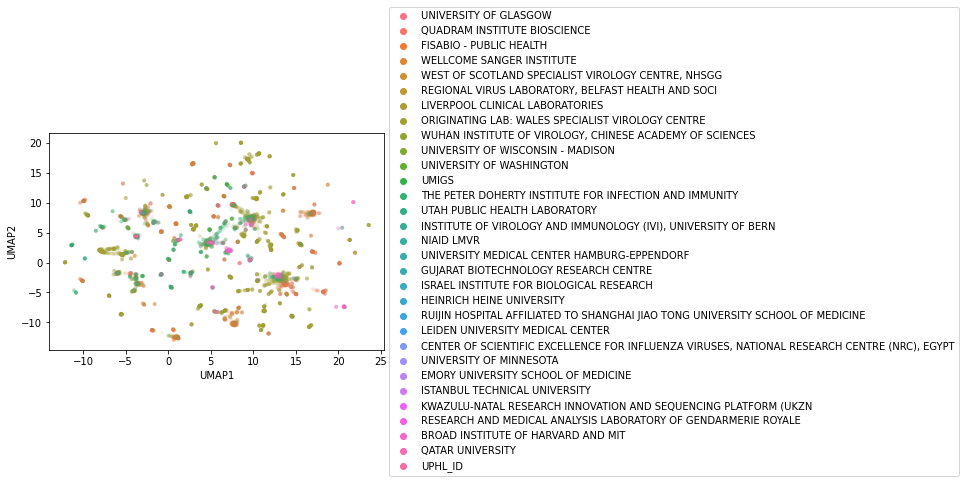

In [40]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding,
hue=metadata_edited.seq_center.to_list(),
alpha=.1, linewidth=0, s=15)
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot.figure.savefig('/Users/alimehdi/Downloads/umap_scatter_seq_center.png', bbox_inches='tight', dpi=1000)

In [ ]:
# try adjusting the data a bit!
matrix_log = np.log2(df.to_numpy() + 1)

In [43]:
# Define UMAP
log_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding_log = pd.DataFrame(log_umap.fit_transform(matrix_log), columns = ['UMAP1','UMAP2'])

In [85]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_log,
hue=metadata_edited.haplotype.to_list(),
alpha=.1, linewidth=0, s=15)
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot.figure.savefig('/Users/alimehdi/Downloads/umap_scatter_seq_center_log.png', bbox_inches='tight', dpi=1000)

NameError: name 'embedding_log' is not defined

In [72]:
df_expression.shape

(1, 949729)

In [78]:
matrix_log.shape

(11775, 29678)

In [82]:
display(metadata_edited)

,sample_id,seq_center,seq_tech,seq_instrument,seq_assay,seq_base_number,sex,age,date,continent_exposure,country_exposure,division_exposure,seq_continent,seq_country,seq_division,host_species,strain,haplotype
0,ERR4082713,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,88515163.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR103/2020,III
1,ERR4082715,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,112550166.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR106/2020,III
2,ERR4082716,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,228938472.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR107/2020,III
3,ERR4082717,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,97572994.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR108/2020,III
4,ERR4082718,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,165317054.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR1081/2020,VIII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11770,SRR12045900,UPHL_ID,ILLUMINA,Illumina MiSeq,AMPLICON,86233980.0,NaN,NaN,2020-04,North America,USA,Utah,North America,USA,Utah,Human,USA/UT-04839/2020,III
11771,SRR12045903,UPHL_ID,ILLUMINA,Illumina MiSeq,AMPLICON,81357144.0,NaN,NaN,2020-04,North America,USA,Utah,North America,USA,Utah,Human,USA/UT-03872/2020,I
11772,SRR12045904,UPHL_ID,ILLUMINA,Illumina MiSeq,AMPLICON,149922424.0,NaN,NaN,2020-04,North America,USA,Utah,North America,USA,Utah,Human,USA/UT-04836/2020,II
11773,SRR12045905,UPHL_ID,ILLUMINA,Illumina MiSeq,AMPLICON,94541298.0,NaN,NaN,2020-04,North America,USA,Utah,North America,USA,Utah,Human,USA/UT-02429/2020,III


In [89]:
df = metadata_edited[metadata_edited.columns[1]]

In [90]:
display(df)

0        UNIVERSITY OF GLASGOW
1        UNIVERSITY OF GLASGOW
2        UNIVERSITY OF GLASGOW
3        UNIVERSITY OF GLASGOW
4        UNIVERSITY OF GLASGOW
                 ...          
11770                  UPHL_ID
11771                  UPHL_ID
11772                  UPHL_ID
11773                  UPHL_ID
11774                  UPHL_ID
Name: seq_center, Length: 11775, dtype: object

In [92]:
vector_df = np.hstack(df)

In [93]:
vector_df

array(['UNIVERSITY OF GLASGOW', 'UNIVERSITY OF GLASGOW',
       'UNIVERSITY OF GLASGOW', ..., 'UPHL_ID', 'UPHL_ID', 'UPHL_ID'],
      dtype='<U92')

In [94]:
matrix_transposed = matrix_log.transpose()

In [ ]:
# new

In [6]:
limma_df_not = pd.read_csv('/Users/alimehdi/Downloads/limma_not_t')

In [16]:
limma_df_not.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11766,V11767,V11768,V11769,V11770,V11771,V11772,V11773,V11774,V11775
0,sample_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,X101,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,...,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488
2,X102,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,...,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172
3,X103,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
4,X104,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,...,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078


In [1]:
limma_df_t = limma_not_t.transpose()

In [3]:
import os, umap
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
limma_dropped = limma_df_not.drop([0], axis=0)

In [8]:
limma_dropped_d = limma_dropped.drop(['Unnamed: 0'], axis=1)

In [9]:
limma_dropped_d.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V11766,V11767,V11768,V11769,V11770,V11771,V11772,V11773,V11774,V11775
1,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,0.000583,...,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488,0.000488
2,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,0.000149,...,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172,0.000172
3,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
4,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,0.000166,...,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078,0.000078
5,0.031846,0.031846,0.031846,0.031846,0.031846,0.031846,0.031846,0.031846,0.031846,0.031846,...,0.031805,0.031805,0.031805,0.031805,0.031805,0.031805,0.031805,0.031805,0.031805,0.031805


In [11]:
limma_no_zero = limma_dropped_d.fillna(0)

In [5]:
# Define UMAP
brain_umap_l = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding_l = pd.DataFrame(brain_umap_l.fit_transform(limma_no_zero), columns = ['UMAP1','UMAP2'])

NameError: name 'limma_no_zero' is not defined

In [4]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot_n = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_l,
alpha=.1, linewidth=0, s=15)
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot.figure.savefig('/Users/alimehdi/Downloads/umap_scatter_seq_center_n.png', bbox_inches='tight', dpi=1000)

NameError: name 'embedding_l' is not defined

In [10]:
limma_df_t = pd.read_csv('/Users/alimehdi/Downloads/limma_df_t.csv', low_memory=False)

In [11]:
limma_df_t.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,29670,29671,29672,29673,29674,29675,29676,29677,29678,29679
0,Unnamed: 0,sample_id,X101,X102,X103,X104,X105,X106,X107,X108,...,X29770,X29771,X29772,X29773,X29774,X29775,X29776,X29777,X29778,seq_center
1,V1,NaN,0.000583115472864808,0.000149135739051656,5.85966225939964e-05,0.000166076370426526,0.0318458356478295,0.000293304791293167,0.000127414860440179,0.00015874915812346101,...,0.0001790825,0.0002174066,0.0001059892,0.0006399486,0.0025883110000000003,6.009499e-05,0.00033936919999999997,0.001243982,0.0006565902,NaN
2,V2,NaN,0.000583115472864808,0.000149135739051656,5.85966225939964e-05,0.000166076370426526,0.0318458356478295,0.000293304791293167,0.000127414860440179,0.00015874915812346101,...,0.0001790825,0.0002174066,0.0001059892,0.0006399486,0.0025883110000000003,6.009499e-05,0.00033936919999999997,0.001243982,0.0006565902,NaN
3,V3,NaN,0.000583115472864808,0.000149135739051656,5.85966225939964e-05,0.000166076370426526,0.0318458356478295,0.000293304791293167,0.000127414860440179,0.00015874915812346101,...,0.0001790825,0.0002174066,0.0001059892,0.0006399486,0.0025883110000000003,6.009499e-05,0.00033936919999999997,0.001243982,0.0006565902,NaN
4,V4,NaN,0.000583115472864808,0.000149135739051656,5.85966225939964e-05,0.000166076370426526,0.0318458356478295,0.000293304791293167,0.000127414860440179,0.00015874915812346101,...,0.0001790825,0.0002174066,0.0001059892,0.0006399486,0.0025883110000000003,6.009499e-05,0.00033936919999999997,0.001243982,0.0006565902,NaN


In [12]:
limma_dropped_t = limma_df_t.drop([0], axis=0)
limma_dropped_td = limma_dropped_t.drop(['Unnamed: 0'], axis=1)
limma_no_zero_t = limma_dropped_td.fillna(0)


In [ ]:
limma_no_zero_t = limma_no_zero_t.drop([0], axis=0)
limma_no_zero_t.head()

In [15]:
# Define UMAP
brain_umap_t = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)
# Fit UMAP and extract latent vars 1-2
embedding_t = pd.DataFrame(brain_umap_t.fit_transform(limma_no_zero_t), columns = ['UMAP1','UMAP2'])

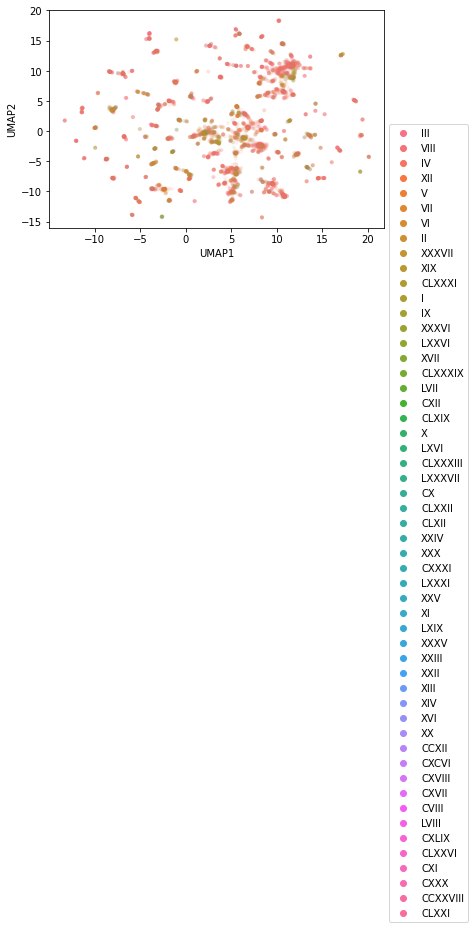

In [87]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot_n = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_t,
                             hue=metadata_edited.haplotype.to_list(),
alpha=.1, linewidth=0, s=15)
# Adjust legend
sns_plot_n.legend(loc='best', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot_n.figure.savefig('/Users/alimehdi/Downloads/umap_scatter_seq_center_t.png', bbox_inches='tight', dpi=1000)

In [40]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans

NameError: name 'sklearn' is not defined

In [69]:
metric_AWS = metrics.silhouette_score(limma_no_zero_t, y_str)

In [71]:
print(metric_AWS)

-0.31059747510436453


In [50]:
metadata_edited.head()

,sample_id,seq_center,seq_tech,seq_instrument,seq_assay,seq_base_number,sex,age,date,continent_exposure,country_exposure,division_exposure,seq_continent,seq_country,seq_division,host_species,strain,haplotype
0,ERR4082713,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,88515163.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR103/2020,III
1,ERR4082715,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,112550166.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR106/2020,III
2,ERR4082716,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,228938472.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR107/2020,III
3,ERR4082717,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,97572994.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR108/2020,III
4,ERR4082718,UNIVERSITY OF GLASGOW,ILLUMINA,Illumina MiSeq,AMPLICON,165317054.0,NaN,NaN,2020-03,Europe,United Kingdom,Scotland,Europe,United Kingdom,Scotland,Human,Scotland/CVR1081/2020,VIII


In [52]:
y = metadata_edited.iloc[:, 1]

In [55]:
y_nonan = y.fillna(0)

In [67]:
y_str = y_nonan.astype(str)

In [68]:
y_str.shape

(11775,)

In [74]:
metric_AWS_df = metrics.silhouette_score(df, y_str)

In [75]:
print(metric_AWS_df)

-0.18874182342443205


In [80]:
def simpson_di(data):

    """ Given a hash { 'species': count } , returns the Simpson Diversity Index
    
    >>> simpson_di({'a': 10, 'b': 20, 'c': 30,})
    0.3888888888888889
    """

    def p(n, N):
        """ Relative abundance """
        if n is  0:
            return 0
        else:
            return float(n)/N

    N = sum(data.values())

    return sum(p(n, N)**2 for n in data.values() if n is not 0)


def inverse_simpson_di(data):
    """ Given a hash { 'species': count } , returns the inverse Simpson Diversity Index
    
    >>> inverse_simpson_di({'a': 10, 'b': 20, 'c': 30,})
    2.571428571428571
    """
    return float(1)/simpson_di(data) 

<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-80-9b9f282fa0cf>:11: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if n is  0:
<ipython-input-80-9b9f282fa0cf>:18: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  return sum(p(n, N)**2 for n in data.values() if n is not 0)


In [82]:
df.simpson_di()

AttributeError: 'DataFrame' object has no attribute 'simpson_di'

In [90]:
df[df > .1] = 0

In [115]:
# Define UMAP
inverted_umap = umap.UMAP(random_state=999, n_neighbors=40, min_dist=.70)
# Fit UMAP and extract latentvars 1-2
embedding_inverted = pd.DataFrame(inverted_umap.fit_transform(df), columns = ['UMAP1','UMAP2'])

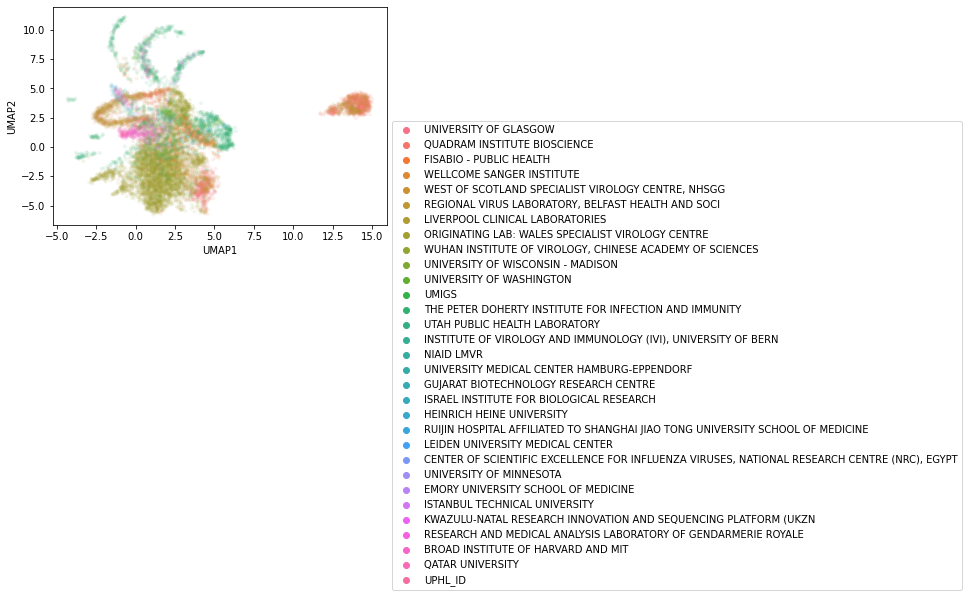

In [130]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot_inverted = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding_inverted,
                             hue=metadata_edited.seq_center.to_list(),
alpha=.1, linewidth=0, s=15)
# Adjust legend
sns_plot_inverted.legend(loc='best', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot_inverted.figure.savefig('/Users/alimehdi/Downloads/umap_inverted_5.png', bbox_inches='tight', dpi=1000)